In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image
from matplotlib import image

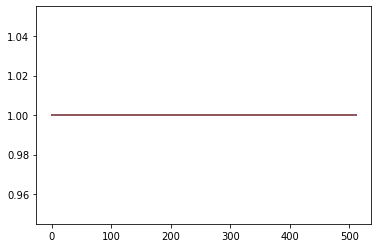

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


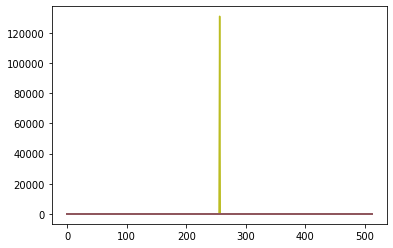

In [ ]:
#Viewing some graphs of fourier transforms

M = 512
N = 256
signal = np.ones((M, N))
plt.plot(signal)
plt.show()
fourieri = np.fft.fft2(signal)
fourieri = np.fft.fftshift(fourieri)
plt.plot(fourieri)
plt.show()

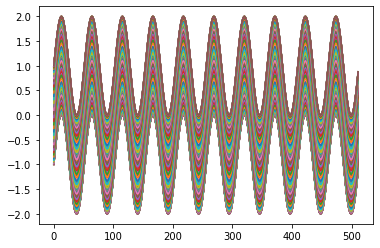

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


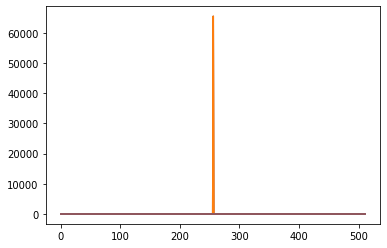

In [ ]:
#More complex signal

for row in range(signal.shape[0]):
    for col in range(signal.shape[1]):
        signal[row][col] = np.sin((20*np.pi*row)/M) + np.cos((6*np.pi*col)/N)
plt.plot(signal)
plt.show()
fourierii = np.fft.fft2(signal)
fourierii = np.fft.fftshift(fourierii)
plt.plot(fourierii)
plt.show()

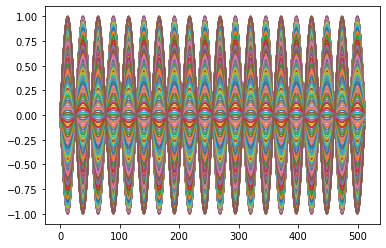

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


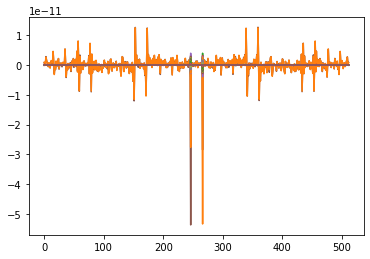

In [ ]:
#Viewing differences between multiplying and adding sin & cos on graph and fourier transform

signal = np.ones((M,N))
for row in range(signal.shape[0]):
    for col in range(signal.shape[1]):
        signal[row][col] = np.sin((20*np.pi*row)/M) * np.cos((6*np.pi*col)/N)
plt.plot(signal)
plt.show()
fourieriii = np.fft.fft2(signal)
fourieriii = np.fft.fftshift(fourieriii)
plt.plot(fourieriii)
plt.show()

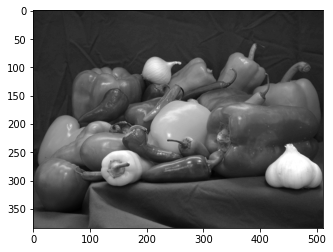

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


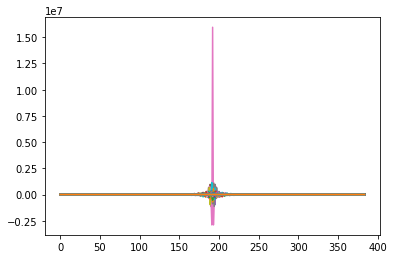

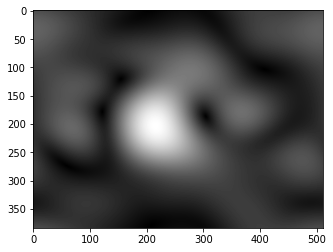


 Comparison: I might have done Problem 3 wrong in the previous assignment, 

because my blurred image for that problem is very blotchy and it seemed to 

kinda flip the dark parts with the light ones. This blurred image looks much 

more like a gaussian blur with the middle part of the image being the brightest 

while the overall shape of the peppers can still be vaguely made out.


In [ ]:
#Fourier transform, gaussian blurring, then inverse fourier transforming to view blurred image

filter = np.zeros((384, 512))
mean = 4
std = 1.5
for x in range(384):
    for y in range(384):
        filter[x,y] = (1 / (2*(math.pi)*std*std))*math.e**(-1*(((x - mean)**2)/(2*std**2) + ((y-mean)**2)/(2*std**2)))

img_PIL = Image.open("/content/peppers (3).png")
image = np.asarray(img_PIL)
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

#zero padding
filter_padded = np.zeros((image.shape[0] + (filter.shape[0]), 
                            image.shape[1] + (filter.shape[1])))   
filter_padded[(filter.shape[0]//2):-(filter.shape[0]//2), 
                (filter.shape[1]//2):-(filter.shape[1]//2)] = filter

#fourier transform
fourier = np.fft.fft2(image)
fourier = np.fft.fftshift(fourier)
plt.plot(fourier)
plt.show()
fourier = fourier * filter

#inverse fourier transform and return 
invfourier = np.fft.ifftshift(fourier)
image2 = np.fft.ifft2(invfourier)
image2 = np.abs(image2)
plt.imshow(image2, cmap=plt.cm.gray)
plt.show()

print("Indeed looks like a gaussian blur with the middle part of the image being the brightest \n")
print("while the overall shape of the peppers can still be vaguely made out.")

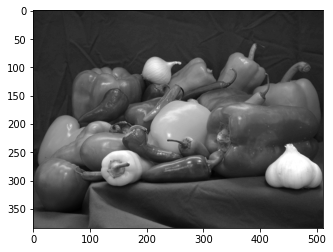

(384, 512)


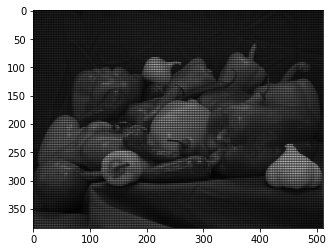

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


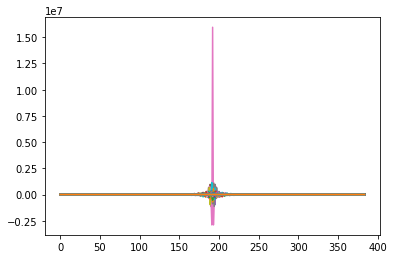

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


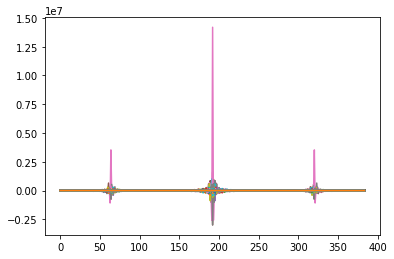

Yes, the filtered image transform looks like a slightly modified version 

of the original image transform. So its intuitively satisfying to me.


In [ ]:
#Fourier transform of image filtered with sobel filter

sobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

img_PIL = Image.open("/content/peppers (3).png")
image = np.asarray(img_PIL)
plt.imshow(image, cmap=plt.cm.gray)
plt.show()
print(image.shape)

#periodic padding
sobel = np.pad(sobel, 256, mode='wrap')
sobel = sobel[1:(383-513) , 1:-2]

sobelImg = image * sobel
sobelImg = np.abs(sobelImg)
plt.imshow(sobelImg, cmap=plt.cm.gray)
plt.show()

#fourier transform of Original Image
fourierOrig = np.fft.fft2(image)
fourierOrig = np.fft.fftshift(fourierOrig)
plt.plot(fourierOrig)
plt.show()

#fourier transform of Filtered Image
fourierFilt = np.fft.fft2(sobelImg)
fourierFilt = np.fft.fftshift(fourierFilt)
plt.plot(fourierFilt)
plt.show()

print("Yes, the filtered image transform looks like a slightly modified version \n")
print("of the original image transform. So its intuitively satisfying to me.")
